Dataset Link: https://www.kaggle.com/farhanmd29/50-startups<br>
### Importing the required Libraries

In [1]:
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

I have attached the link to download the dataset, If you are going to run it in Google Colab, upload the dataset to the runtime before compiling the code.

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Now we take the first 4 columns as the independent variables and the profit column as the dependent variable. We seperate them.

In [3]:
x = df.iloc[:,:4]
y = df.iloc[:,-1:]
x_df = pd.DataFrame(x)
y_df = pd.DataFrame(y)

We noticed that the State is a categorical data, we have to one hot encode them so use the LabelBinarizer instance to do this job.

In [4]:
State_bin = LabelBinarizer()
x_df = x_df.join(pd.DataFrame(State_bin.fit_transform(x_df.State.values),
                              columns=State_bin.classes_,
                              index=x_df.index))
x_new = x_df.drop(['State'], axis=1)
x_new.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


Now the new DataFrame after the One hot encoding is done.


In [5]:
new_df = x_new.join(y_df)
new_df.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York,Profit
0,165349.20,136897.80,471784.10,0,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,0,191792.06
2,153441.51,101145.55,407934.54,0,1,0,191050.39
3,144372.41,118671.85,383199.62,0,0,1,182901.99
4,142107.34,91391.77,366168.42,0,1,0,166187.94


Now, we have preprocessed our independent variables. The next step towards building the models is finding the correlation between the independent and the dependent variable.<br>
Here I am going to use the Pearson Correlation for the feature selection.

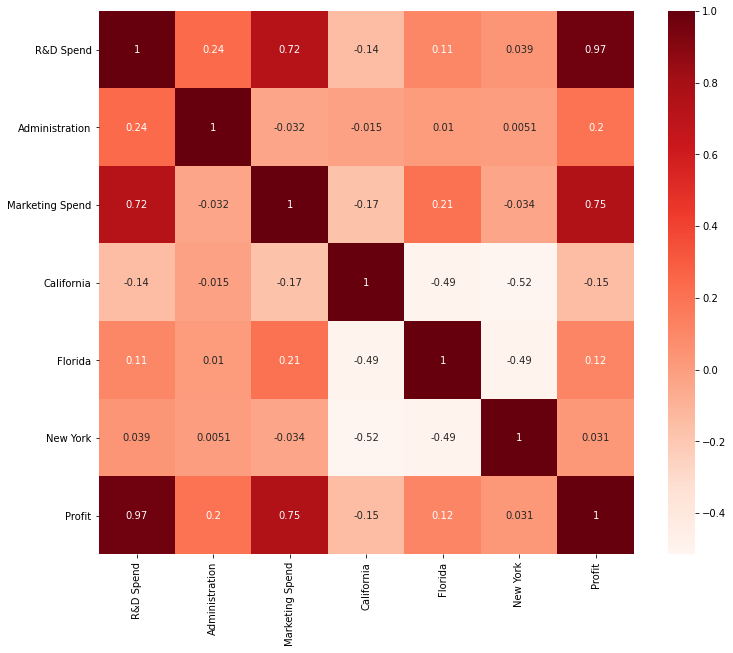

In [6]:
plt.figure(figsize=(12,10))
cor = new_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

From the Plot, we see that R&D Spent and the Marketing Spend features have a high correlation with the Profit (dependent variable).
We only need to make use of these features to build our Regression Model.

In [7]:
cor_target = abs(cor["Profit"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

R&D Spend          0.972900
Marketing Spend    0.747766
Profit             1.000000
Name: Profit, dtype: float64

Before builiding our model, we need to make sure that the selected features are not correlated with each other.

In [8]:
print(new_df[["R&D Spend","Marketing Spend"]].corr())

                 R&D Spend  Marketing Spend
R&D Spend         1.000000         0.724248
Marketing Spend   0.724248         1.000000


In this case, we see that they are corelated, so we have choose between these two, choosing R&D Spend is the best option as R&D Spend and the Profit are highly correlated.

In [9]:
xx = x_new.drop(["Administration", "Marketing Spend", "California", "Florida", "New York"], axis=1)
xx.head()

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [10]:
x_train, x_test, y_train, y_test = train_test_split(xx, y_df, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(40, 1) (10, 1) (40, 1) (10, 1)


### SGD

In [17]:
reg = SGDRegressor(max_iter=10000)
reg.fit(x_train, y_train.values.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [18]:
y_predict = reg.predict(x_test)

In [19]:
print(mean_squared_error(y_test, y_predict))
print(r2_score(y_test, y_predict))

1.6211066401647484e+38
-1.790363141322698e+29


### Linear Regression

In [14]:
reg_Linear = LinearRegression()
reg_Linear.fit(x_train,y_train)
yy_predict = reg_Linear.predict(x_test) 

In [16]:
print(r2_score(y_test,yy_predict))

0.9156856275813965
